# TAREA 1 BIOINFORMÁTICA
 Sara Tolosa Alarcón
 
 4º Biotecnología

## Preparación del ambiente de computación

Para poder ejecutar los análisis de este cuaderno es necesario:

1. Instalar BLAST.
2. Descomprimir el archivo taxdb.btd.gz

Para hacerlo de forma automática desde R, disponemos en esta carpeta del pequeño *script* de BASH: `preparar_ambiente.sh`. Esta vez, sólo hace falta ejecutar el bloque siguiente, sin necesidad de salir del cuaderno:

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

## Introducción
El objetivo de esta tarea será analizar si encontramos homologías en tres proteínas **(CHRM1, CHRNA3, CHRNA7)** que participan en neuroreceptores de acetilcolina con alguna proteína de la base de datos de Swissprot utilizando blastp. Una vez comprobadas las homologías, podríamos plantearnos si algunas de las mismas corresponde con linajes anteriores al ancestro común entre cnidarios y cordados, tal y como proponen Viscardi *et al*. En mi caso me he centrado en la proteína **CHRNA7**.

## Métodos
La base de datos de secuencias en la que voy a buscar homologías és Swissprot, una base de datos de proteínas instalada localmente en este ambiente.

Uilizaré **blastp** (Altschul *et al.*, 1990) con diferentes umbrales de valor E, para determinar a qué ritmo aumenta la distribución taxonómica de las secuencias encontradas a medida que se relaja el grado de similitud exigido. Es decir, a medida que acepto como resultados del **blastp** secuencias con un valor E mayor. 

## Resultados
### BLASTP individual
Primero, ejecuto una única búsqueda con **blastp**, usando un umbral de valor E de 1.0e-50, que es muy exigente: sólo las secuencias extremadamente parecidas a la original apareceran en los resultados.

In [3]:
# Observa entre los argumentes la especificación del formato de salida,
# "-outfmt". Si hace falta, desliza la barra para visualizar la línea completa.
BlastpOutCHRNA7 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRNA7.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

# El resultado del comando anterior, guardado en "BlastOutCHRNA7", es un montón de
# texto plano. Con las funciones textConnection() y read.table(), lo transformamos
# en un "data frame", una tabla donde cada columna es una variable. La opción
# "col.names" en read.table() sirve para dar nombre a las columnas.
TablaOutCHRNA7 <- read.table(textConnection(BlastpOutCHRNA7),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))
# Dimensiones de la tabla:
dim(TablaOutCHRNA7)

[1] 120  11

La tabla de resultados vemos que contiene **120 secuencias homologas**, incluyendo la misma secuencia usada como *query* que en mi caso sería la secuencia de CHRNA7.


In [7]:
# Invocamos la tabla para ver algunos de los resultados que hemos obtenido, 
# incluyendo el inicio y el final de la tabla.

TablaOutCHRNA7

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P36544.5,100.000,502,1,502,1,502,0.00e+00,9606,Homo sapiens,primates
Q866A2.1,99.004,502,1,502,1,502,0.00e+00,9544,Macaca mulatta,primates
P54131.1,94.567,497,6,502,3,499,0.00e+00,9913,Bos taurus,even-toed ungulates
Q05941.2,93.964,497,6,502,6,502,0.00e+00,10116,Rattus norvegicus,rodents
P49582.1,93.964,497,6,502,6,502,0.00e+00,10090,Mus musculus,rodents
P22770.1,92.133,483,20,502,20,502,0.00e+00,9031,Gallus gallus,birds
Q494W8.1,100.000,385,118,502,28,412,0.00e+00,9606,Homo sapiens,primates
P48180.1,44.919,492,10,494,6,497,4.41e-145,6239,Caenorhabditis elegans,nematodes
A8WQK3.2,44.732,503,10,494,7,498,7.60e-145,6238,Caenorhabditis briggsae,nematodes


### BLASTP en serie

En este apartado realizaremos múltiples búsquedas utilizando diferentes valores E. Para hacerlo de forma automática, usamos la función `lapply()`. En primer lugar, generamos un vector `Valores_E_maximos` que contendrá los diferentes valores que queramos darle a E. A continuación, se ejecutará una búsqueda de blastp para cada valor del vector . El resultado será una lista de tablas, similar a la que hemos obtenido anteriormente.

He decido escoger 11 valores E y, por tanto, obtendré una lista de 10 tablas guardadas en el objeto `Lista de Tablas` que son resultado de los 11 blastp que se han ejecutado.
 

In [8]:
Valores_E_maximos <- c('1.0e-80', '1.0e-60', '1.0e-50', '1.0e-40', '1.0e-30',
                       '1.0e-20', '1.0e-10', '1.0e-08', '1.0e-05','1.0e-02', '1')

# La función lapply() aplicará una función (segundo argumento) sobre
# cada uno de los valores de la lista o vector indicados en el primer
# argumento (Valores_E_maximos, en este caso). 

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRNA7.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })


Podemos acceder individualmente a cada una de las tablas mediante los dobles corchetes, eligiendo si queremos ver el final (utilizando la función `tail()`) o el principio (con la función `head()`) de la tabla escogida. En mi caso, he elegido que me muestre 10 resultados de cada uno.


In [9]:
tail(Lista_de_Tablas[[2]],n=10)

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
104,P02718.1,30.488,492,33,501,34,507,1.89e-73,7787,Tetronarce californica,sharks and rays
105,P49580.1,30.417,503,6,488,3,492,4.13e-71,8355,Xenopus laevis,frogs & toads
106,P02714.1,29.839,496,17,493,13,495,2.58e-68,7787,Tetronarce californica,sharks and rays
107,P07510.2,31.653,496,22,490,21,495,3.07e-68,9606,Homo sapiens,primates
108,P13536.1,30.943,488,26,490,26,497,3.43e-68,9913,Bos taurus,even-toed ungulates
109,P18916.2,30.435,483,26,490,26,497,7.45e-68,10116,Rattus norvegicus,rodents
110,P04760.1,30.928,485,26,490,26,497,3.51e-66,10090,Mus musculus,rodents
111,P09660.2,30.595,487,22,485,19,477,1.36e-65,10116,Rattus norvegicus,rodents
112,P20782.1,30.185,487,22,485,19,476,1.75e-64,10090,Mus musculus,rodents


In [10]:
head(Lista_de_Tablas[[11]], n=10)

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
1,P36544.5,100.000,502,1,502,1,502,0.00e+00,9606,Homo sapiens,primates
2,Q866A2.1,99.004,502,1,502,1,502,0.00e+00,9544,Macaca mulatta,primates
3,P54131.1,94.567,497,6,502,3,499,0.00e+00,9913,Bos taurus,even-toed ungulates
4,Q05941.2,93.964,497,6,502,6,502,0.00e+00,10116,Rattus norvegicus,rodents
5,P49582.1,93.964,497,6,502,6,502,0.00e+00,10090,Mus musculus,rodents
6,P22770.1,92.133,483,20,502,20,502,0.00e+00,9031,Gallus gallus,birds
7,Q494W8.1,100.000,385,118,502,28,412,0.00e+00,9606,Homo sapiens,primates
8,P48180.1,44.919,492,10,494,6,497,4.41e-145,6239,Caenorhabditis elegans,nematodes
9,A8WQK3.2,44.732,503,10,494,7,498,7.60e-145,6238,Caenorhabditis briggsae,nematodes


Podemos conocer el número de secuencias homólogas a CHRNA7 ha encontrado blastp en la base de datos Swissprot para cada uno de los valores E que hemos determinado anteriormente. Para ello,con conocer las filas (x) de las tablas anteriores es suficiente. Aplico la función `dim()` para que me devuelva las dimensiones del objeto `Lista_de_Tablas` (en nuestro caso el número de filas):

In [11]:
Numero_de_resultadosCHRNA7 <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultadosCHRNA7

[1]  84 113 120 123 129 129 160 171 204 252 265

Se puede ver que conforme aumenta el umbral del valor E, se van encontrando más secuencias homólogas, siendo para un valor de 1 dónde más secuencias se encuentran: 265.



Además, podemos hacer una representación gráfica que nos muestre el número de secuencias homólogas encontradas en función de los diferentes valores E seleccionados:

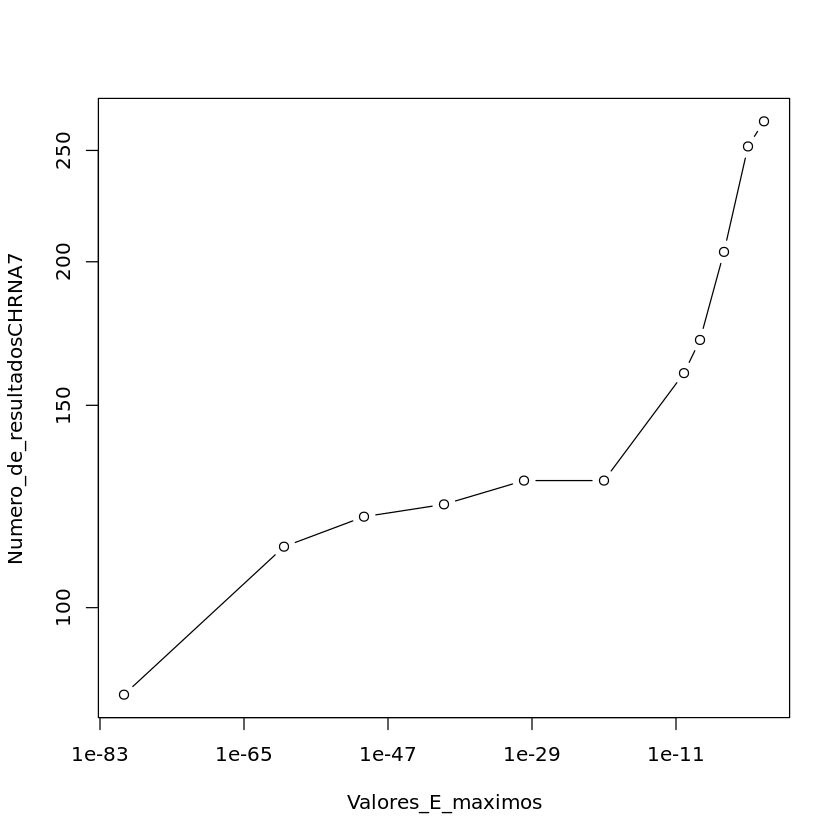

In [12]:
# En la representación gráfica, podemos usaré la escala logarítmica en ambos
# ejes ("log='xy'").

plot(Valores_E_maximos, Numero_de_resultadosCHRNA7, log = 'xy', type = 'b')

Gráficamente se ve mucho más claro la afirmación anterior: cuanto mayor es el número del parámetro E, se encuentra un mayor número de secuencias homólogas. Esto tiene lógica ya que al aumentar dicho valor E, obtenemos secuencias que se parecen remotamente a CHRNA7, siendo nuestros resultados menos significativos. 


A continuación examino la relación entre la longitud del alineamiento y el valor E de los resultados guardados en la última tabla (valor E de 1) y en la novena tabla (valor E de $10^{-5}$).


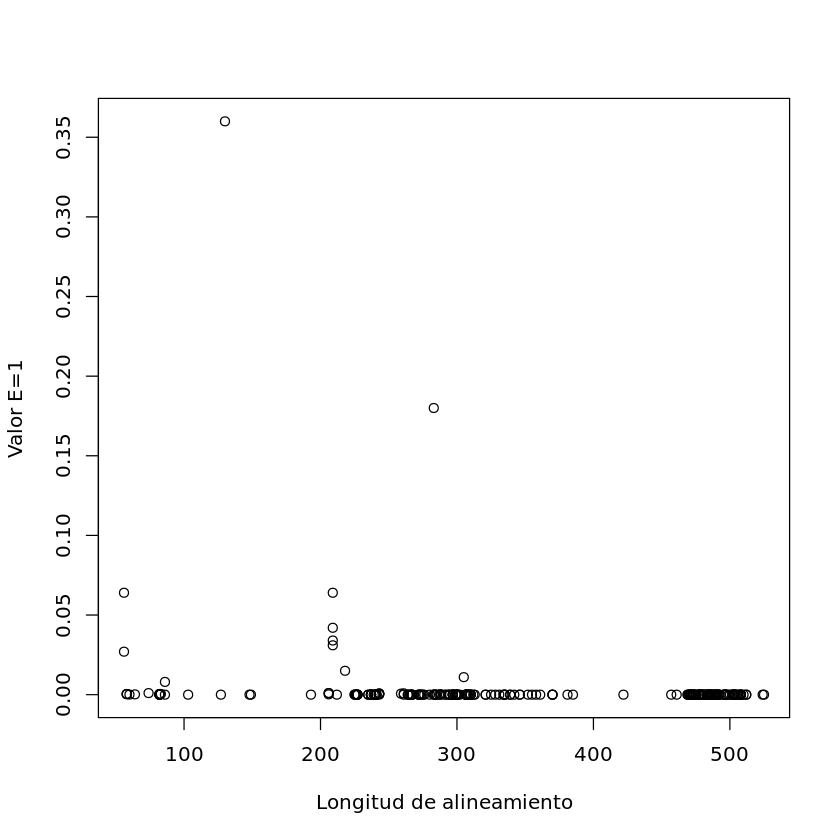

In [13]:
# El símbolo "$" extrae de un "data frame" una columna. Si ejecutas
# "Lista_de_Tablas[[10]]$length", veremos que el resultado es el vector
# de las longitudes de los alineamientos de la décima tabla.


plot(Lista_de_Tablas[[11]]$length, Lista_de_Tablas[[11]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E=1')

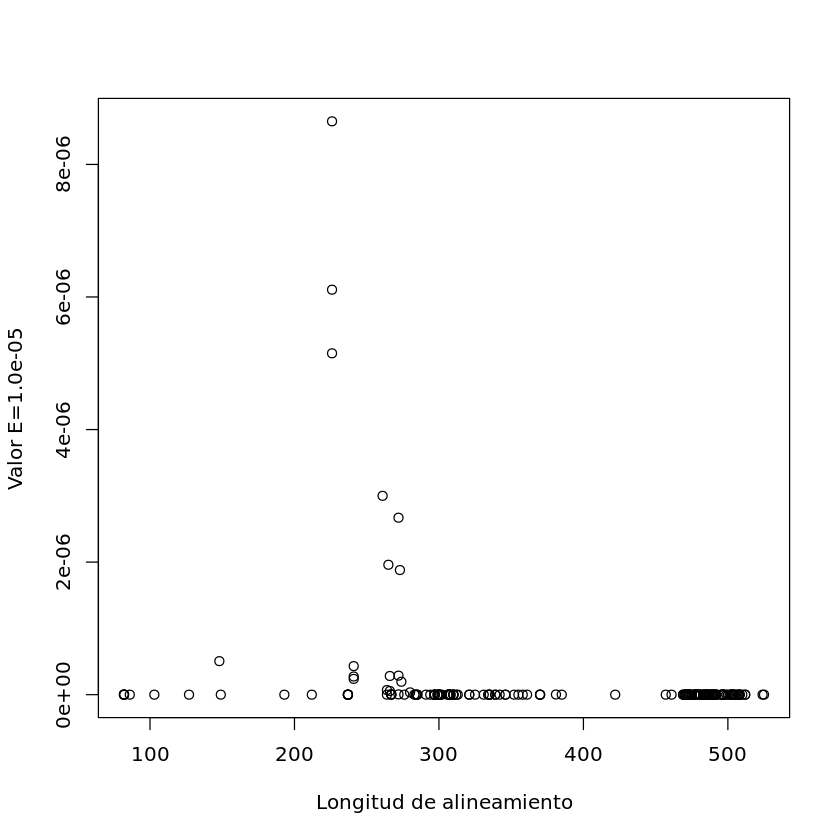

In [7]:
plot(Lista_de_Tablas[[9]]$length, Lista_de_Tablas[[9]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E=1.0e-05')

La subunidad alfa-7 del receptor nicotínico de acetilcolina (CHRNA7) se trata de una proteína que está compuesta por 502 aminoácidos, y si observamos la longitud de los alineamientos encontrados para valores E elevados, por ejemplo igual a 1 o a 1.0e-05, podemos ver que existen alineamientos de menor tamaño. Esto es indicativo de que al realizar el blastp encontramos en esta base de datos algunas proteínas que presentan cierta homología con CHRNA7 en algún fragmento. Se tratan de homologías parciales con la proteína de estudio. 

Vemos que hay algunos alineamientos de aproximadamente 200 aminoácidos e incluso de menos de 100 aminoácidos, podríamos pensar que se trata de zonas conservadas de la proteína. Pero de todas las secuencias encontradas (120 incluyendo la *query*) solo se trata de unas pocas de ellas. Se podría comprobar qué posición de CHRNA7 se trata y si se trata de una región con función conservada en algún taxon concreto.


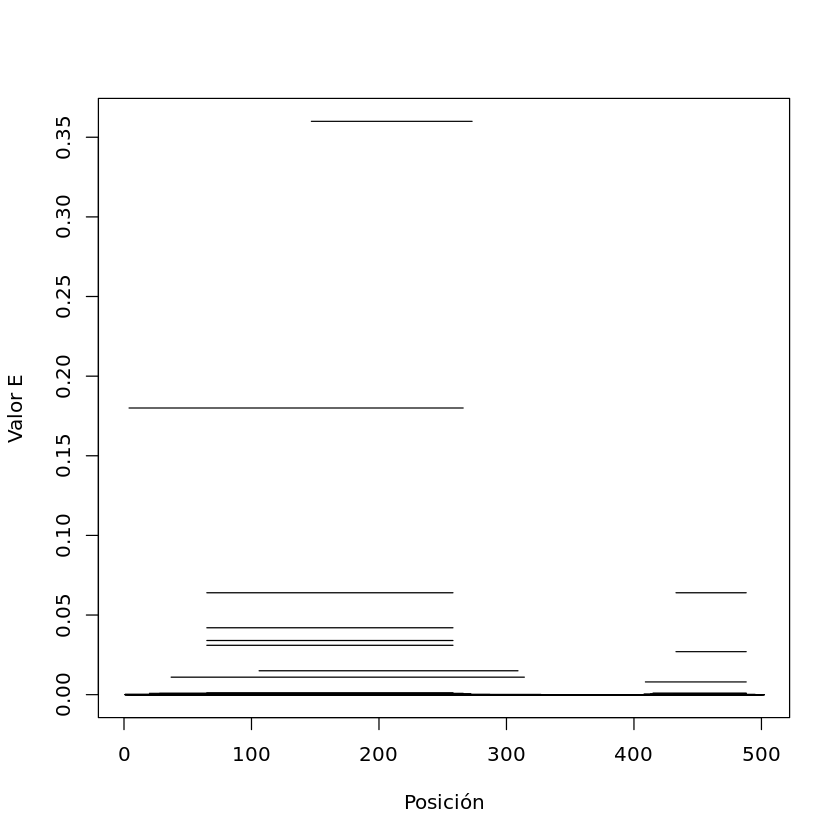

In [14]:
inicios <- Lista_de_Tablas[[11]]$qstart
finales <- Lista_de_Tablas[[11]]$qend
valoresE <- Lista_de_Tablas[[11]]$evalue

# La función segments() añade segmentos a un gráfico previo. Por eso, represento
# antes un gráfico con los rangos adecuados, pero vacío (type='n'). Para determinar
# el rango del eje horizontal, determino primero el valor máximo de "qend".

AlineamientoMaximo <- max(Lista_de_Tablas[[11]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

Podemos observar en esta gráfica que para el valor E más alto, las homologías encontradas al realizar el blastp se concentran entre las posiciones de 50 y 250 y entre 400 y 500 aminoácidos, más o menos. Por tanto, vemos que no las secuencias no se distribuyen aleatoriamente a lo largo de la secuencia de CHRNA7.


A continuación, exploramos la distribución taxonómica de las secuencias encontradas, contando en cada tabla que hemos generado las secuencias encontradas de cada grupo taxonómico:

In [15]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 12                   7                   1                   5 
              flies       frogs & toads        grasshoppers               moths 
                  4                   2                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                  9                  18                  22                   2 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 14                  21                  30                   5 

[[3]]

     

Del resultado obtenido podemos destacar por ejemplo, en la tabla número 7 (valor E de $10^{-10}$) empiezan a aparecer secuencias homólogas a CHRNA7 de anfibios y de polillas. También se muestra un grupo no identificado (N/A). Por otro lado, para un valor E de $10^{-5}$, en la novena tabla, aparece una secuencia homóloga que procede de una cianobacteria.

Podemos buscar dentro de esta tabla, de qué organismo se trata y ver el porcentaje de identidad entre su secuencia y la *query* en su alineamiento local. Se trata de la proteína [Q7NDN8.1](https://www.ncbi.nlm.nih.gov/protein/Q7NDN8.1) de *Gloeobacter violaceus PCC 7421* con un porcentaje de identidad del 21.786%.

In [19]:
tail(Lista_de_Tablas[[9]],n=30)

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
175,Q61603.3,25.773,291,5,274,17,299,3.15e-10,10090,Mus musculus,rodents
176,O00591.1,23.860,285,30,298,41,311,3.62e-10,9606,Homo sapiens,primates
177,O09028.1,22.887,284,30,298,41,311,4.85e-10,10116,Rattus norvegicus,rodents
178,P50573.1,22.615,283,34,309,64,343,5.03e-10,10116,Rattus norvegicus,rodents
179,Q08832.2,21.927,301,32,317,46,337,5.59e-10,7227,Drosophila melanogaster,flies
180,O18276.3,23.207,237,65,287,92,319,5.62e-10,6239,Caenorhabditis elegans,nematodes
181,P27681.2,21.348,267,31,287,52,311,1.20e-09,10090,Mus musculus,rodents
182,P28473.1,21.348,267,31,287,52,311,1.22e-09,10116,Rattus norvegicus,rodents
183,A8MPY1.2,21.723,267,50,309,82,346,2.33e-09,9606,Homo sapiens,primates


Ahora realizaré un recuento de los grupos taxonómicos pero contando solo aquellas secuencias que presenten un alineamiento de al menos 250 aminoácidos:

In [21]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 250
       table(x[filtro, 'sblastname'])
    })

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 12                   7                   1                   5 
              flies       frogs & toads        grasshoppers               moths 
                  4                   2                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                  9                  18                  22                   2 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 14                  21                  30                   5 

[[3]]

     

En este aparatado, podemos extraer de conclusión que la proteína CHRNA7 presenta un número mayor de homologías con proteínas de primates, roedores y nematodos.

## DECIPHER

A continuación, voy a utilizar las herramientas del paquete DECIPHER (Wright, 2016) para alinear las 120 secuencias encontradas para un valor E de 1.0e-50 y generar un archivo *html*, de manera que podamos ver de forma más visual el alineamiento de las secuencias homólogas a la proteína CHRNA7. Este archivo le hemos llamado *BlastpOutCHRNA7.html*.


In [2]:
# En primer lugar, genero un archivo de texto llamado "AccessionList.txt", 
# que contendrá los identificadores de las secuencias homólogas a CHRNA7 encontradas 
# en la base de datos de swissprot con un valor E de 1.0e-50.

system2(command = 'blastp',
         args = c('-query', 'CHRNA7.fas',
                  '-db', 'swissprot',
                  '-out', 'AccessionList.txt',
                  '-outfmt', '"6 saccver"',
                  '-evalue', '1.0e-50'),
         wait = TRUE)


# El argumento "-outfmt" lo empleo para indicar el formato que queremos en nuestro archivo de salida,
# y seguido de '"6 saccver"' para señalarle que únicamente queremos el número de acceso o identificadores
# de las proteínas que ha encontrado

In [3]:
# A continuación, utilizo el comando "blastdbcmd" y el argumento "-entry_batch"
# que me permitirá obtener un archivo FASTA llamado "BlastHitsCHRNA7" con las secuencias 
# correspondientes a los identificadores recogidos en el archivo  AccessionList.txt

system2(command = 'blastdbcmd',
           args = c('-db', 'swissprot',
                    '-entry_batch', 'AccessionList.txt',
                    '-out', 'BlastHitsCHRNA7.fas'))

In [26]:
#Instalo el paquete DECHIPHER

suppressMessages(library('DECIPHER'))

In [27]:
fastaFile <- 'BlastHitsCHRNA7.fas'
aa <- readAAStringSet(fastaFile)
aa

  A AAStringSet instance of length 120
      width seq                                             names               
  [1]   502 MRCSPGGVWLALAASLLHVSLQ...ICTIGILMSAPNFVEAVSKDFA P36544.5 RecName:...
  [2]   502 MRCSQGGVWLALAASLLHVSLQ...ICTIGILMSAPNFVEAVSKDFA Q866A2.1 RecName:...
  [3]   499 MRGSLCLALAASILHVSLQGEF...LCTIGILMSAPNFVEAVSKDFA P54131.1 RecName:...
  [4]   502 MCGGRGGIWLALAAALLHVSLQ...ICTIGILMSAPNFVEAVSKDFA Q05941.2 RecName:...
  [5]   502 MCGRRGGIWLALAAALLHVSLQ...ICTIGILMSAPNFVEAVSKDFA P49582.1 RecName:...
  ...   ... ...
[116]   478 MLLWVQQALLALLLPTLLAQGE...YLLAVLAYSITLVMLWSIWQYA P46098.1 RecName:...
[117]   564 MTLKIRTIIILFCVISVTTTSQ...LILVGRMAQYSYDHPDDRFFNV P54244.1 RecName:...
[118]   487 MRLCIPQVLLALFLSMLTAPGE...YLLAVLAYSITLVTLWSIWHYS P23979.1 RecName:...
[119]   490 MVLWLQLALLALLLPTSLAQGE...YLLAVLAYSITLVTLWSVWHYA O70212.1 RecName:...
[120]   548 MLIIIQSLLLATTASLCIADTP...ITFGINFIGFIHWHQAGVEYGG O76554.1 RecName:...

In [ ]:
alineamientoCHRNA7 <- AlignSeqs(aa)          

In [29]:
BrowseSeqs (alineamientoCHRNA7,htmlFile='alineamientoCHRN7.html')

## Discusión


Para la realización de esta tarea he trabajado con la secuencia de la proteína CHRNA7 de *Homo sapiens* como consulta (*query*) para realizar búsquedas de **blastp**. Tras su realización, se puede observar que encontramos 120 proteínas homólogas en multitud de taxones (incluyendo la *query*): primates, roedores, aves, nemátodos, etc.

Sabiendo que CHRNA7 (502 aminoácidos) se trata de una subunidad paráloga de un receptor nicotínico de acetilcolina y apoyándome en el artículo de Viscardi *et al* junto con los resultados aquí descritos, se concluye que la proteína CHRNA7 presenta multitud de homólogos con otras proteínas que en su mayoría están relacionadas con la función neuronal y con especies próximas a la humana. A su vez, he podido encontrar relación con otras proteínas como son los canales iónicos. 

Además, como he mencionado anteriormente, encontramos una secuencia con un porcentaje de identidad del 21.786%, no muy alto pero tampoco despreciable, del organismo *Gloeobacter violaceus PCC 7421*. Esta cianobacteria presenta la proteína [Q7NDN8.1](https://www.ncbi.nlm.nih.gov/protein/Q7NDN8.1) que se trata de un canal iónico. Aún así, estas proteínas estan asociadas con funciones celulares básicas, por lo que no se puede concluir que exista una homología en cuanto a su función entre la subunidad alfa-7 de un receptor neuronal de acetilcolina y un canal iónico de una cianobacteria. Tal y como mencionan Viscardi *et al*, estos canales tienen una gran importancia en la comunicación neuronal, por lo tanto su número aumenta conforme aumenta la complejidad del sistema nervioso del organismo.

Esto me lleva a pensar que pueden existir ciertas regiones conservadas que se compartan. Bajo esta premisa, he realizado una búsqueda en el *NCBI* de la proteína CHRNA 7 de *Homo sapiens* y he comprobado que las regiones comprendidas entre los aminoácidos 231 y 490 nos encontramos con regiones transmembrana, que se caracterizan por ser ricas en aminoácidos hidrofóbicos, mientras que algunas de las anteriores a estas constituyen sitios de glicosidación. Por tanto, una hipótesis que plantearía es que podría existir una región conservada en la zona transmembrana de la proteína. Se podría llevar este análisis utilizando el programa MEGA7 con el archivo FASTA BlastHitsCHRNA7, que contiene las 120 secuencias homólogas encontradas con blastp.

Por otro lado, a partir del archivo *.html* generado, en el que se muestra el alineamiento de las secuencias encontradas, he podido observar de manera más visual las proteínas encontradas y a qué organismos pertenecen. He realizado una búsqueda manual (utilizando Ctrl+F) para ver que, por ejemplo, 6 de ellas se trataban de canales iónicos o que 18 de ellas se trataban de proteínas de *Homo sapiens*. 

Finalmente, y con el objetivo de resolver algunas de las dudas sobre si existen o no homólogos anteriores al ancestro entre cordados y cnidarios, pienso que podríamos realizar una búsqueda empleando PSI-BLAST del NCBI. De esta forma, podríamos realizar múltiples búsquedas hasta encontrar homólogos remotos, obteniendo mayor información que la que obtenemos realizando blastp. Además, para realizar búsquedas mas restrictivas, podríamos excluir los clado de los Deutorostomados (ID:33511) y el filo cnidarios (ID:6073) y emplear un valor E por ejemplo de 0,001. De esta forma, le obligamos al sistema que nos encuentre homólogos a nuestra proteína interés. También podríamos emplear otra base de datos como por ejemplo Pfam o RefSeq.



## Referencias

- Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, *Molecular Biology and Evolution*, Volume 38, Issue 3, March 2021, Pages 735–744, [doi:10.1093/molbev/msaa252](https://academic.oup.com/mbe/article/38/3/735/5912542)

- Moriwaki Y, Kubo N, Watanabe M, Asano S, Shinoda T, Sugino T,. (15/04/2021). *NCBI*. "Neuronal Acetylcholine Receptor Subunit Alpha-7 Isoform 1 Precursor [Homo Sapiens]".  https://www.ncbi.nlm.nih.gov/protein/NP_000737.1.

- ES Wright. "Using DECIPHER v2.0 to Analyze Big Biological Sequence Data in R." *The R Journal*, 8(1), 352-359. 2016



